In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import os
import pickle

In [ ]:
har19 = pd.read_csv('./Data_2019_Harmisar_Lake')
har19.drop(['Temperature.1'], axis=1, inplace=True)
har20 = pd.read_csv('./Data_2020_Harmisar_Lake')
har20.drop(['Temperature.1'], axis=1, inplace=True)
har21 = pd.read_csv('./Data_2021_Harmisar_Lake')
har21.drop(['Temperature.1'], axis=1, inplace=True)
sh19 = pd.read_csv('./Data_Shinai_Lake_2019')
sh19.drop(['Temperature.1'], axis=1, inplace=True)
sh20 = pd.read_csv('./Data_2020_Shinai_Lake')
sh20.drop(['Temperature.1'], axis=1, inplace=True)
sh21 = pd.read_csv('./Data_2021_Shinai_Lake')
sh21.drop(['Temperature.1'], axis=1, inplace=True)
tp19 = pd.read_csv('./Data_2019_Tappar_Lake')
tp19.drop(['Temperature.1'], axis=1, inplace=True)
tp20 = pd.read_csv('./Data_2020_Tappar_Lake')
tp20.drop(['Temperature.1'], axis=1, inplace=True)
tp21 = pd.read_csv('./Data_2021_Tappar_Lake')

In [ ]:
df = pd.concat([har19, har20, har21, sh19, sh20, sh21, tp19, tp20, tp21], sort=False, ignore_index=True)
df = df.dropna()
df.reset_index(inplace = True)


In [ ]:
df2 = pd.read_csv('/content/Labelled_Water_Quality_Test_Data')
df2.drop('Unnamed: 0', axis=1, inplace = True)
df2

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,3.8988,0.078488,32.793515,7.947743,-0.294758,549.557941,583.667839,0.396270,poor
1,3.5545,0.080925,32.538873,7.963302,-0.293956,536.530471,571.537606,0.399182,poor
2,3.0556,0.099511,31.499795,7.968399,-0.306319,552.699882,586.735346,0.402367,poor
3,4.2448,0.107438,31.597208,7.933890,-0.315240,548.849625,581.622721,0.416024,Needs Treatment
4,3.6567,0.097600,31.945846,7.954725,-0.314448,538.229792,571.925856,0.407589,poor
5,3.9033,0.070254,32.162891,7.917765,-0.304469,506.822533,548.001141,0.405728,poor
6,2.9820,0.090032,31.479287,7.963951,-0.306849,555.488937,589.856959,0.404355,poor
7,3.3292,0.071141,32.159473,7.953067,-0.281019,538.277017,572.809822,0.381776,poor
8,3.8406,0.091437,32.417533,7.925500,-0.302987,519.246363,562.438468,0.409639,poor
9,3.1711,0.099851,32.320120,7.956498,-0.304575,539.235666,572.603046,0.391304,poor


In [ ]:
df.head()

,index,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
0,0,12.09465,0.069321,37.161745,8.041302,0.121313,0.725741,0.693219,0.056578
1,1,12.11300,0.076764,37.081421,8.048733,0.132800,0.721721,0.688101,0.056296
2,2,11.32280,0.078845,34.003494,8.051699,0.124332,0.722972,0.693820,0.052928
3,3,11.86615,0.070844,37.091675,8.019703,0.124319,0.715208,0.687501,0.046865
4,4,11.60495,0.061277,36.980590,8.017540,0.113232,0.730613,0.696639,0.048846


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
count_nan = len(df) - df.count()
print('% of missing values ',count_nan/len(df))
print('No. of missing values ',count_nan)
print('Length of the dataframe ',len(df))
print('Total workable values ',df.count())

% of missing values  Dissolved Oxygen            0.650513
Salinity                    0.650513
Temperature                 0.650513
pH                          0.650513
Turbidity                   0.650513
Dissolved Organic Matter    0.000000
Suspended Matter            0.000000
Temperature.1               0.732992
Chlorophyll                 0.650513
dtype: float64
No. of missing values  Dissolved Oxygen            2792
Salinity                    2792
Temperature                 2792
pH                          2792
Turbidity                   2792
Dissolved Organic Matter       0
Suspended Matter               0
Temperature.1               3146
Chlorophyll                 2792
dtype: int64
Length of the dataframe  4292
Total workable values  Dissolved Oxygen            1500
Salinity                    1500
Temperature                 1500
pH                          1500
Turbidity                   1500
Dissolved Organic Matter    4292
Suspended Matter            4292
Temperature.1 

In [ ]:
df['Dissolved Organic Matter'] = df['Dissolved Organic Matter']*1000
df['Suspended Matter'] = df['Suspended Matter']*1000
df.head()

,index,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
0,0,12.09465,0.069321,37.161745,8.041302,0.121313,725.740766,693.218830,0.056578
1,1,12.11300,0.076764,37.081421,8.048733,0.132800,721.721279,688.101107,0.056296
2,2,11.32280,0.078845,34.003494,8.051699,0.124332,722.971727,693.820139,0.052928
3,3,11.86615,0.070844,37.091675,8.019703,0.124319,715.207917,687.500787,0.046865
4,4,11.60495,0.061277,36.980590,8.017540,0.113232,730.613271,696.638694,0.048846


In [ ]:
df2['Dissolved Organic Matter'] = df2['Dissolved Organic Matter']*1000
df2['Suspended Matter'] = df2['Suspended Matter']*1000
df2.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,3.8988,0.078488,32.793515,7.947743,-0.294758,549557.941082,583667.839085,0.396270,poor
1,3.5545,0.080925,32.538873,7.963302,-0.293956,536530.470837,571537.605787,0.399182,poor
2,3.0556,0.099511,31.499795,7.968399,-0.306319,552699.882287,586735.345921,0.402367,poor
3,4.2448,0.107438,31.597208,7.933890,-0.315240,548849.624705,581622.721404,0.416024,Needs Treatment
4,3.6567,0.097600,31.945846,7.954725,-0.314448,538229.792100,571925.855773,0.407589,poor


In [ ]:
df.boxplot(figsize=(15,15))

In [ ]:
df.boxplot(column=['Dissolved Oxygen'],figsize=(15,15))

In [ ]:
good = df.drop('index', axis=1).copy()
poor = df.drop('index', axis=1).copy()
needs_treatment = df.drop('index', axis=1).copy()

In [ ]:
good = good[(good['Chlorophyll']>=-0.1)& (good['Chlorophyll']<=0.1)&(good['Dissolved Organic Matter']<500)& 
            (good['Dissolved Oxygen']>6.5)& 
            (good['pH']>=6.5)&(good['pH']<=8.5)& 
            (good['Suspended Matter']>=300)& 
            (good['Suspended Matter']<=600)  & 
            (good['Turbidity']>=-0.2)&
            (good['Turbidity']<=0)&
            (good['Temperature']>=15)&
            (good['Temperature']<=35)]
good.count()

Dissolved Oxygen            461
Salinity                    461
Temperature                 461
pH                          461
Turbidity                   461
Dissolved Organic Matter    461
Suspended Matter            461
Chlorophyll                 461
dtype: int64

In [ ]:
good.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
336,8.607483,0.140199,32.333792,7.332831,-0.134986,482.654214,549.775467,0.060282
337,8.672250,0.141625,31.886031,7.287873,-0.158115,489.803376,552.842017,0.068695
338,8.349350,0.085519,32.412406,7.309844,-0.169355,492.299274,536.438907,0.072072
348,8.154483,0.026860,28.392815,7.212134,-0.156744,489.007999,548.253018,0.058345
349,8.132050,0.080670,28.519281,7.215738,-0.158215,490.330077,548.673713,0.043999


In [ ]:
good['Class'] = 'good'
good.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
336,8.607483,0.140199,32.333792,7.332831,-0.134986,482.654214,549.775467,0.060282,good
337,8.672250,0.141625,31.886031,7.287873,-0.158115,489.803376,552.842017,0.068695,good
338,8.349350,0.085519,32.412406,7.309844,-0.169355,492.299274,536.438907,0.072072,good
348,8.154483,0.026860,28.392815,7.212134,-0.156744,489.007999,548.253018,0.058345,good
349,8.132050,0.080670,28.519281,7.215738,-0.158215,490.330077,548.673713,0.043999,good


In [ ]:
poor = df.drop('index', axis=1).copy()

In [ ]:
poor = poor[(poor['Chlorophyll']>0.5)|(poor['Dissolved Organic Matter']>2000)|
            (poor['Dissolved Oxygen']<4)|
            ((poor['pH']>11)&(poor['pH']<14))| 
            ((poor['pH']>1)&(poor['pH']<4))|
            ((poor['Suspended Matter']>900)&
            (poor['Suspended Matter']<1200))|
            (poor['Turbidity']>0.2)|(poor['Temperature']>40)|
            (poor['Temperature']<5)]
poor.count()

Dissolved Oxygen            50
Salinity                    50
Temperature                 50
pH                          50
Turbidity                   50
Dissolved Organic Matter    50
Suspended Matter            50
Chlorophyll                 50
dtype: int64

In [ ]:
poor['Class'] = 'poor'

In [ ]:
poor.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
51,3.61210,0.129864,31.985154,8.186117,0.110010,663.435313,661.023577,0.069235,poor
55,1.56440,0.121675,31.557901,8.140952,0.074759,644.828609,643.981722,0.117434,poor
59,-1.64705,0.071878,31.052034,8.137029,0.114588,643.465335,641.382925,0.066642,poor
60,0.92655,0.209632,29.965104,8.053754,-0.156542,647.200392,641.993723,0.168203,poor
70,-0.02850,0.086873,30.221455,8.139188,0.065870,633.885459,631.604616,0.069537,poor


In [ ]:
df_gp = pd.concat([poor,good],ignore_index=True)

In [ ]:
df_gp.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,3.61210,0.129864,31.985154,8.186117,0.110010,663.435313,661.023577,0.069235,poor
1,1.56440,0.121675,31.557901,8.140952,0.074759,644.828609,643.981722,0.117434,poor
2,-1.64705,0.071878,31.052034,8.137029,0.114588,643.465335,641.382925,0.066642,poor
3,0.92655,0.209632,29.965104,8.053754,-0.156542,647.200392,641.993723,0.168203,poor
4,-0.02850,0.086873,30.221455,8.139188,0.065870,633.885459,631.604616,0.069537,poor


In [ ]:
df_gp.tail()
df.count()

index                       1500
Dissolved Oxygen            1500
Salinity                    1500
Temperature                 1500
pH                          1500
Turbidity                   1500
Dissolved Organic Matter    1500
Suspended Matter            1500
Chlorophyll                 1500
dtype: int64

In [ ]:
df_all = df_gp.merge(df.drop_duplicates(), on=['Dissolved Oxygen','Salinity','Temperature','pH','Turbidity','Dissolved Organic Matter','Suspended Matter','Chlorophyll'], 
                   how='right', indicator=True)
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class,index,_merge
0,12.09465,0.069321,37.161745,8.041302,0.121313,725.740766,693.218830,0.056578,NaN,0,right_only
1,12.11300,0.076764,37.081421,8.048733,0.132800,721.721279,688.101107,0.056296,NaN,1,right_only
2,11.32280,0.078845,34.003494,8.051699,0.124332,722.971727,693.820139,0.052928,NaN,2,right_only
3,11.86615,0.070844,37.091675,8.019703,0.124319,715.207917,687.500787,0.046865,NaN,3,right_only
4,11.60495,0.061277,36.980590,8.017540,0.113232,730.613271,696.638694,0.048846,NaN,4,right_only


In [ ]:
len(df_all)

1500

In [ ]:
df_all['Class'].fillna('Needs Treatment', inplace=True)
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class,index,_merge
0,12.09465,0.069321,37.161745,8.041302,0.121313,725.740766,693.218830,0.056578,Needs Treatment,0,right_only
1,12.11300,0.076764,37.081421,8.048733,0.132800,721.721279,688.101107,0.056296,Needs Treatment,1,right_only
2,11.32280,0.078845,34.003494,8.051699,0.124332,722.971727,693.820139,0.052928,Needs Treatment,2,right_only
3,11.86615,0.070844,37.091675,8.019703,0.124319,715.207917,687.500787,0.046865,Needs Treatment,3,right_only
4,11.60495,0.061277,36.980590,8.017540,0.113232,730.613271,696.638694,0.048846,Needs Treatment,4,right_only


In [ ]:
df_all = df_all.dropna()

In [ ]:
df_all = df_all.drop_duplicates()
len(df_all)

1500

In [ ]:
df_all = df_all.drop(columns=['_merge','index'])

In [ ]:
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,12.09465,0.069321,37.161745,8.041302,0.121313,725.740766,693.218830,0.056578,Needs Treatment
1,12.11300,0.076764,37.081421,8.048733,0.132800,721.721279,688.101107,0.056296,Needs Treatment
2,11.32280,0.078845,34.003494,8.051699,0.124332,722.971727,693.820139,0.052928,Needs Treatment
3,11.86615,0.070844,37.091675,8.019703,0.124319,715.207917,687.500787,0.046865,Needs Treatment
4,11.60495,0.061277,36.980590,8.017540,0.113232,730.613271,696.638694,0.048846,Needs Treatment


In [ ]:
dict = {'Needs Treatment' : 0, 'poor' : 1, 'good' : 2}
df_all = df_all.replace({"Class": dict})
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,12.09465,0.069321,37.161745,8.041302,0.121313,725.740766,693.218830,0.056578,0
1,12.11300,0.076764,37.081421,8.048733,0.132800,721.721279,688.101107,0.056296,0
2,11.32280,0.078845,34.003494,8.051699,0.124332,722.971727,693.820139,0.052928,0
3,11.86615,0.070844,37.091675,8.019703,0.124319,715.207917,687.500787,0.046865,0
4,11.60495,0.061277,36.980590,8.017540,0.113232,730.613271,696.638694,0.048846,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
import seaborn as sns
import matplotlib as mpl

In [ ]:
import sklearn
import pickle

In [ ]:
mpl.rcParams.update({"axes.grid" : True, "grid.color": "black"})
sns.set(font_scale = 1)

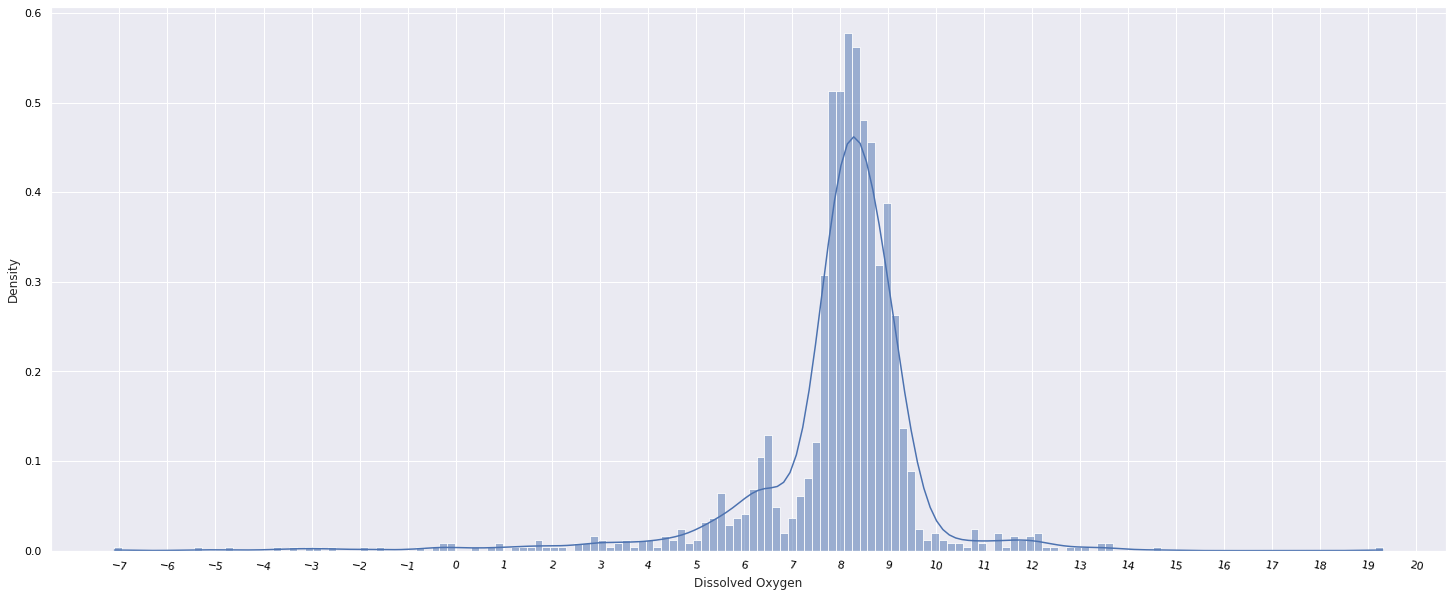

In [ ]:
fig = plt.figure(figsize=(25,10))
ax= sns.histplot(df_all['Dissolved Oxygen'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(-7, df_all['Dissolved Oxygen'].max() + 1, 1))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

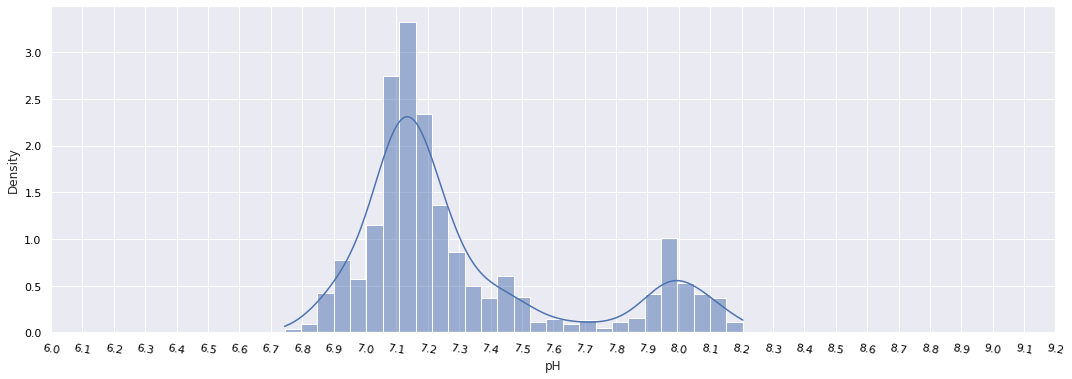

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.histplot(df_all['pH'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(6, df_all['pH'].max() + 1, 0.1))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

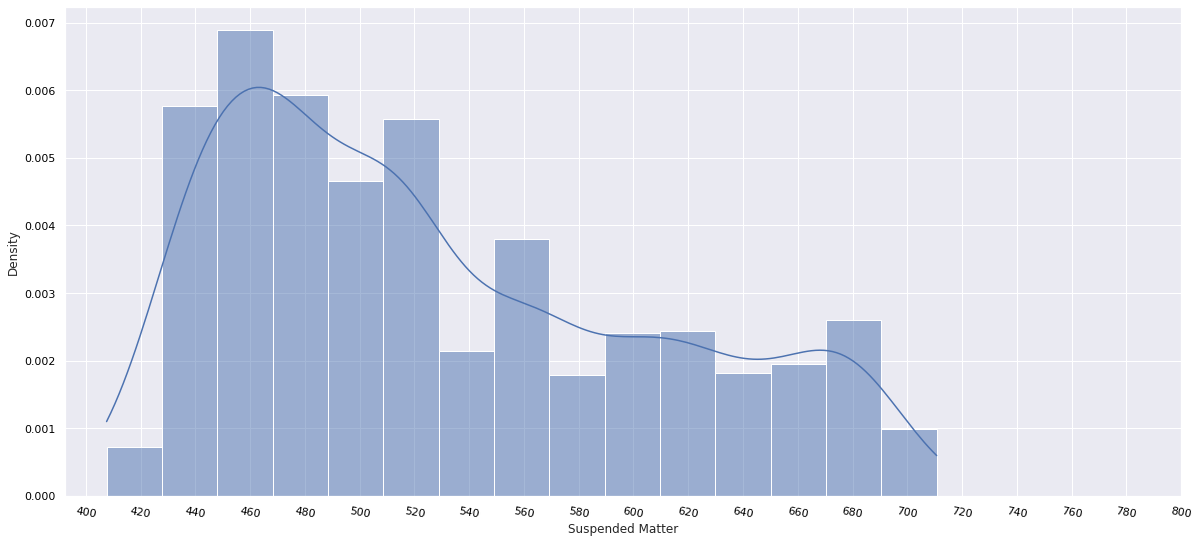

In [ ]:
plt.figure(figsize=(20,9))
ax = sns.histplot(df_all['Suspended Matter'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(400,df_all['Suspended Matter'].max() + 100, 20))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

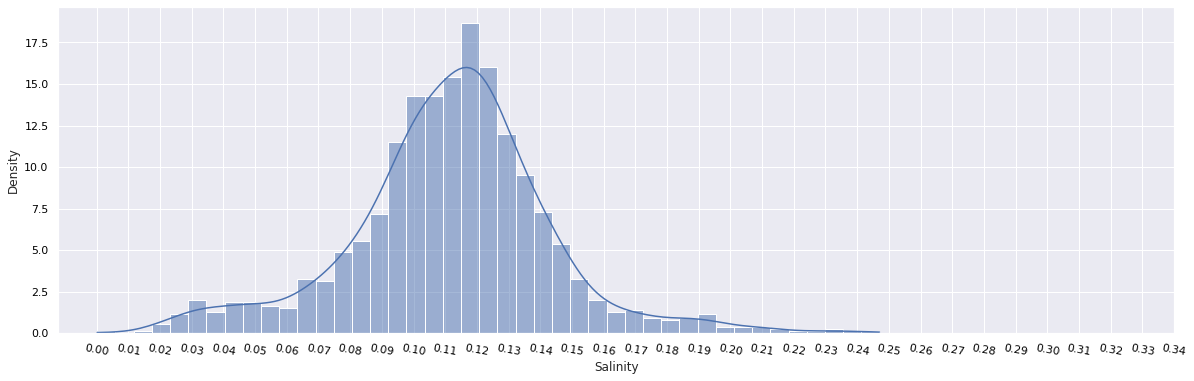

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.histplot(df_all['Salinity'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(0,df_all['Salinity'].max() + 0.1, 0.01))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

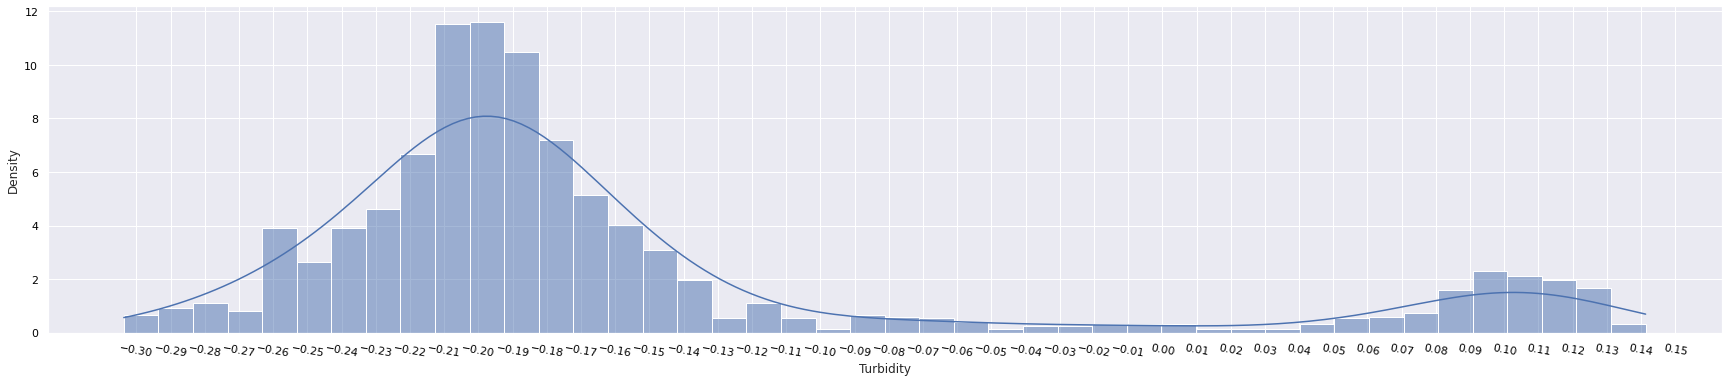

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.histplot(df_all['Turbidity'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(-0.3,df_all['Turbidity'].max() + 0.01, 0.01))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

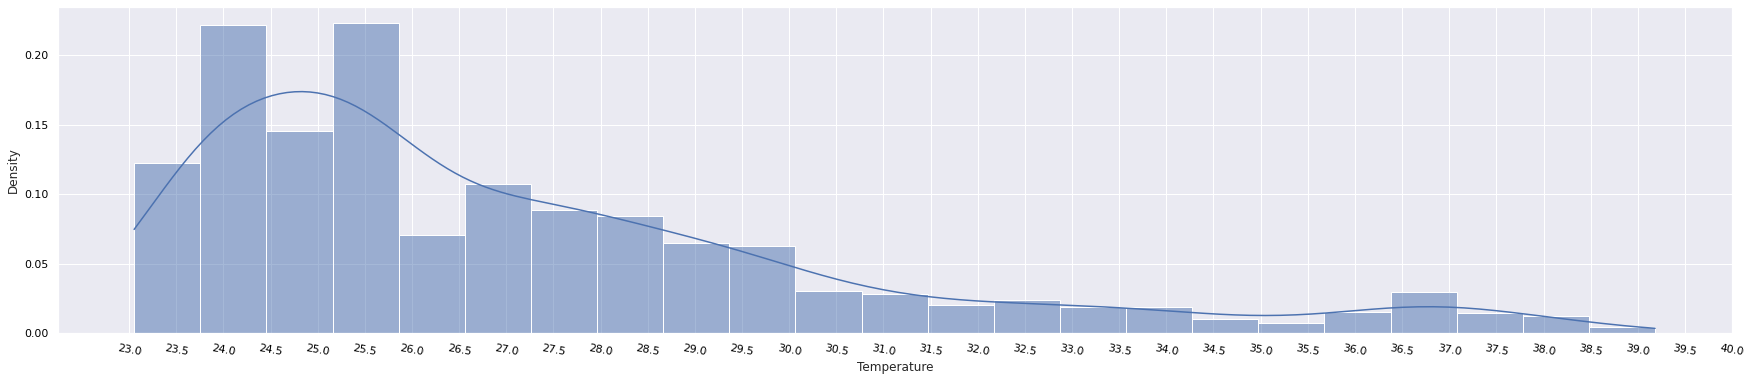

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.histplot(df_all['Temperature'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(23,df_all['Temperature'].max() + 1, 0.5))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

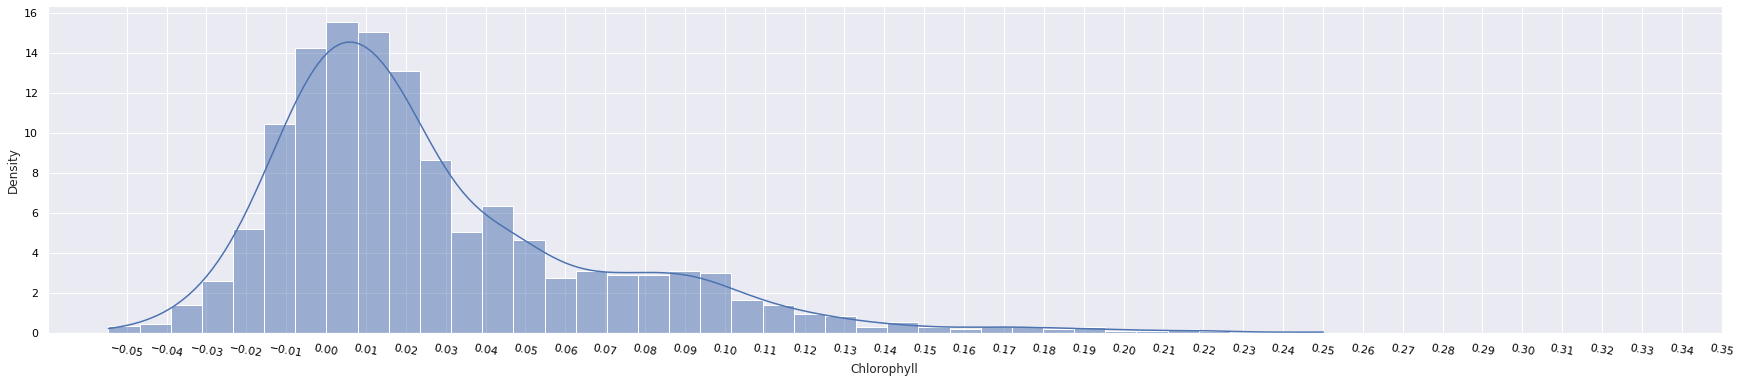

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.histplot(df_all['Chlorophyll'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(-0.05,df_all['Chlorophyll'].max() + 0.1, 0.01))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

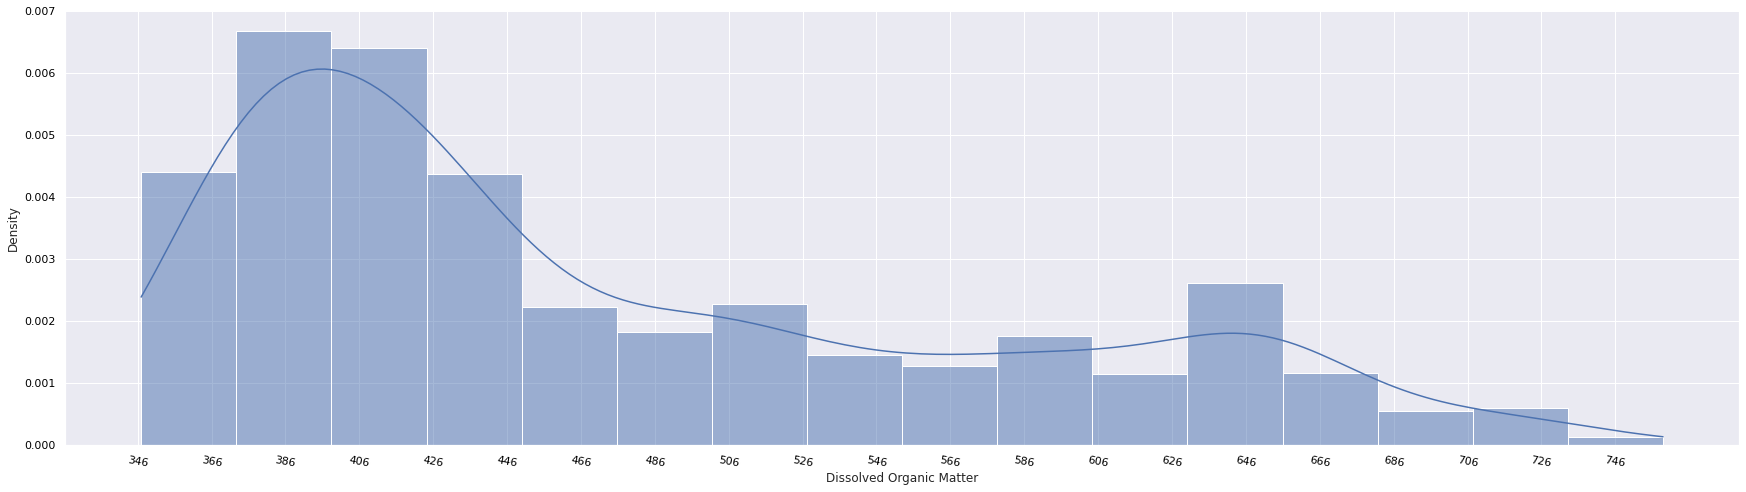

In [ ]:
plt.figure(figsize=(30,8))
ax = sns.histplot(df_all['Dissolved Organic Matter'], kde=True, stat="density")
ax.tick_params(axis='y', colors='black') 
ax.tick_params(axis='x', colors='black') 
ax.set_xticks(np.arange(346,df_all['Dissolved Organic Matter'].max() + 2, 20))
plt.setp(ax.get_xticklabels(), rotation=-10)
plt.show()

In [ ]:
y = df_all['Class']

In [ ]:
X = df_all.drop(['Salinity', 'Class'], axis = 1)
y = df_all['Class']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_valid = X_train.copy(), X_valid.copy()
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1200, 7) (300, 7) (1200,) (300,)


In [ ]:
X_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_valid), columns=X_valid.columns)

In [ ]:
##test data
test = pd.DataFrame(MinMaxScaler().fit_transform(df2.drop(['Salinity', 'Class'], axis=1)), columns=df2.drop(['Salinity','Class'], axis=1).columns)

In [ ]:
X_train_scaled.head()

,Dissolved Oxygen,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
0,0.567335,0.923413,0.853788,0.995184,0.721202,0.881874,0.328551
1,0.507737,0.121751,0.500980,0.356170,0.573433,0.613034,0.490907
2,0.548357,0.029612,0.250971,0.272834,0.038586,0.094373,0.271547
3,0.558127,0.135066,0.334737,0.135468,0.144420,0.235892,0.257950
4,0.549919,0.386238,0.252051,0.286893,0.387874,0.519848,0.429210


In [ ]:
X_valid_scaled.head()

,Dissolved Oxygen,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
0,0.723594,0.052591,0.243902,0.238491,0.060022,0.089008,0.245923
1,0.614661,0.837024,0.858991,0.930282,0.725441,0.850610,0.422696
2,0.652323,0.533326,0.960021,0.945103,0.671106,0.753438,0.609627
3,0.713900,0.357285,0.305426,0.272087,0.409591,0.530145,0.489249
4,0.864134,0.511293,0.880320,0.971215,0.948546,0.949847,0.351522


In [ ]:
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)
X_train_over = pd.DataFrame(X_train_over)
print(Counter(y_train_over))

Counter({0: 791, 2: 791, 1: 791})


In [ ]:
oversample = SMOTE()
X_valid_over, y_valid_over = oversample.fit_resample(X_valid_scaled, y_valid)
X_valid_over = pd.DataFrame(X_valid_over)
print(Counter(y_valid_over))

Counter({0: 198, 2: 198, 1: 198})


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import cross_val_score
train_cross_scores = []
valid_cross_scores = []
rfr = RandomForestClassifier()
rfr.fit(X_train_over, y_train_over)
train_score = cross_val_score(rfr, X_train_over, y_train_over, cv=5)
train_cross_scores.append(round(train_score.mean(),2))
valid_score = cross_val_score(rfr, X_valid_over, y_valid_over, cv=5)
valid_cross_scores.append(round(valid_score.mean(),2))

print(train_cross_scores)
print(valid_cross_scores)

[1.0]
[1.0]


In [ ]:
with open('water-model1.pkl', 'wb') as f:
    pickle.dump(rfr, f)

In [ ]:
y_valid_over.shape

(594,)

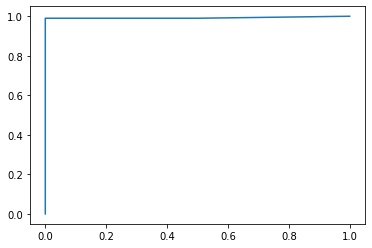

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)
rf_pred = cross_val_predict(rf, X_valid_over, y_valid_over, cv=5)
# print(roc_auc_score(y_valid_over, rf_pred, multi_class='ovr'))

fpr, tpr, _ = roc_curve(y_valid_over.values, rf_pred, pos_label=2)
plt.plot(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_over, rf_pred, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       1.00      1.00      1.00       198
           2       1.00      0.99      0.99       198

    accuracy                           1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594



In [ ]:
## test data
rf.predict(test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

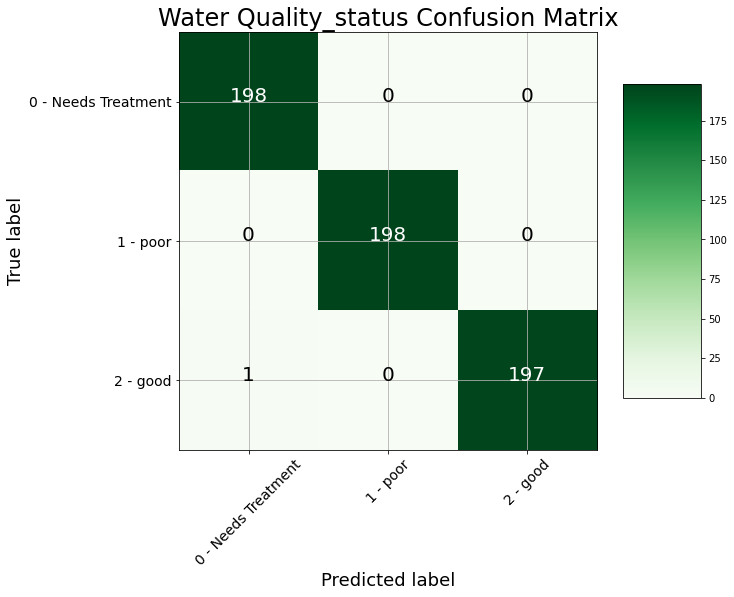

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_valid_over, rf_pred)
plot_confusion_matrix(cm, classes = ['0 - Needs Treatment', '1 - poor', '2 - good'],
                      title = 'Water Quality_status Confusion Matrix')